# Studio dello spettro delle frequenze: motivazione

Lo trasformata di Fourier è una procedura matematica estremamamente utile per misurare l'importanza delle frequenze che compongono un segnale.

E' utile in molti ambiti come ad esempio, analisi dei segnali e dei circuiti, soluzione di equazioni differenziali, compressione delle immagine (algoritmo JPEG) e altri.

Questo materiale spiegerà come svolgere la Discrete Cosine Tranform, che è una versione discreta della transformata dei Fourier (ovvero l'input è una lista discretizzata di valori che una funzione assume su valori disposti con spaziatura costante sull'asse di input della x, per esempio:

In [1]:
xs = [i/5 for i in range(11)]
def squared(x):
    return x**2
xs_squared = [round(squared(i), 2) for i in xs]
print(xs)
print(xs_squared)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
[0.0, 0.04, 0.16, 0.36, 0.64, 1.0, 1.44, 1.96, 2.56, 3.24, 4.0]


# Ricostruire un vettore tramite prodotti scalari con vettori noti


Un qualsiasi vettore in $N$ dimensioni può essere ricostruito a partire dal risultato del suo prodotto con $N$ vettori noti, lavorando in $R^3$ per evitare pesantezza simbolica (ma il ragionamento è valido in $R^n$):

Supponiamo di avere un vettore $\boldsymbol{v}$ e una base ortonormale:

\begin{equation}
B = \{ \boldsymbol{b_1}, \boldsymbol{b_2}, \boldsymbol{b_3}\}
\end{equation}

E di conoscere il valore dei seguenti prodotti scalari:

\begin{equation}
\boldsymbol{b_{1}} \boldsymbol{v} = s_1
\end{equation}

\begin{equation}
\boldsymbol{b_{2}} \boldsymbol{v} = s_2
\end{equation}

\begin{equation}
\boldsymbol{b_{3}} \boldsymbol{v} = s_3
\end{equation}

Allora avremo che $v$ è la combinazione lineare dei vettori di base, in cui il coefficiente di $b_i$ è $s_i$ infatti sfruttando che la base è ortonormale (e quindi $\boldsymbol{b_{1}} \boldsymbol{b_{1}} = 1$ e $\boldsymbol{b_{1}} \boldsymbol{b_{2}} = 0$ e $\boldsymbol{b_{1}}\boldsymbol{b_{3}}=0$):

\begin{equation}
\boldsymbol{b_{1}} (s_1 \boldsymbol{b_1} +s_2 \boldsymbol{b_2} +s_3 \boldsymbol{b_3} )   = s_1
\end{equation}

\begin{equation}
\boldsymbol{b_{2}} (s_1 \boldsymbol{b_1} +s_2 \boldsymbol{b_2} +s_3 \boldsymbol{b_3} )   = s_2
\end{equation}

\begin{equation}
\boldsymbol{b_{2}} (s_1 \boldsymbol{b_1} +s_2 \boldsymbol{b_2} +s_3 \boldsymbol{b_3} )   = s_3
\end{equation}




Per esempio data la base canonica:

\begin{equation}
\boldsymbol{e_1} = \begin{pmatrix}1 \\0 \\0 \end{pmatrix}
\end{equation}

\begin{equation}
\boldsymbol{e_2} =\begin{pmatrix}0 \\1 \\0 \end{pmatrix}
\end{equation}

\begin{equation}
\boldsymbol{e_3} =\begin{pmatrix}0 \\0 \\1 \end{pmatrix}
\end{equation}

Se sappiamo per un vettore $\textbf{v}$ il valore dei seguenti prodotti scalari:

\begin{equation}
\boldsymbol{e_{1}} \boldsymbol{v} = 3
\end{equation}

\begin{equation}
\boldsymbol{e_{2}} \boldsymbol{v} = 5
\end{equation}


\begin{equation}
\boldsymbol{e_{3}} \boldsymbol{v} = -1
\end{equation}

Il vettore $v$ sarà:

\begin{equation}
\boldsymbol{v} =\begin{pmatrix}3 \\5 \\-1 \end{pmatrix}
\end{equation}




# Discrete Cosine Transform: studio delle frequenze tramite prodotto scalare con vettori coseno con frequenze diverse

Possiamo utilizzare il risultato ottenuto sopra per scrivere un vettore come combinazione lineare di coseni, ovvero per svolgere la Discrete Cosine Transform di quel vettore, estraendo l'importanza di ogni frequenza nel ricostruire il vettore.

Infatti è sufficente ripetere il discorso fatto prima semplicemente sostituendo la base delle $\boldsymbol{b_i}$ con una base di coseni:


\begin{equation}
C = \{ \boldsymbol{c_1}, \boldsymbol{c_2}, \boldsymbol{c_3}\, \boldsymbol{c_4}\}
\end{equation}

E di conoscere il valore dei seguenti prodotti scalari:

\begin{equation}
\boldsymbol{c_{1}} \boldsymbol{v} = s_1
\end{equation}

\begin{equation}
\boldsymbol{c_{2}} \boldsymbol{v} = s_2
\end{equation}

\begin{equation}
\boldsymbol{c_{3}} \boldsymbol{v} = s_3
\end{equation}

\begin{equation}
\boldsymbol{c_{4}} \boldsymbol{v} = s_4
\end{equation}

Per ricostruire il vettore originario, questo è importante perchè significa che non stiamo perdendo informazioni quando effettuiamo una discrete cosine transform.

I vettori $\{ \boldsymbol{c_1}, \boldsymbol{c_2}, \boldsymbol{c_3}\, \boldsymbol{c_4}\}$ sono una rappresentazione discreta di coseni con diverse frequenze:

[[ 0.5         0.5         0.5         0.5       ]
 [ 0.73186407  0.5606404   0.12708686 -0.36593203]
 [ 0.67991415  0.11806585 -0.63891031 -0.33995708]
 [ 0.63245553 -0.31622777 -0.31622777  0.63245553]]


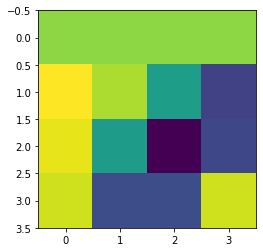

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

xs = np.linspace(0, 1, num=4)
cosines = np.array(
    normalized([np.cos(f_i * 2 * np.pi * xs) for f_i in np.linspace(0, 1, num=4)])
)

print(cosines)
plt.imshow(cosines)

Ora se abbiamo un qualsiasi vettore possiamo chiedere quanto contiene oscillazioni di diversa frequenza, semplicemente moltiplicandolo con la matrice dei coseni: ogni elemento del risultato sarà il prodotto scalare tra uno dei coseni nelle righe della matrice e il vettore dato:

In [3]:
v = [0.5, 0.5, 0.5, 0.5]

cosines @ v

array([ 1.        ,  0.52682965, -0.09044369,  0.31622777])

Possiamo notare che lavorando in dimensioni molto basse non abbiamo una buona ortogonalità tra le righe della matrice, ma questo problema sarà mitigato aumentando le dimensioni, come vedremo dopo.

# Analogia prodotto scalare - Integrale del prodotto

Questa procedura è del tutto analoga a quella della trasformata di fourier per funzioni continue, infatti:

\begin{equation}
\int f(x) g(x) dx \approx \boldsymbol{f} \cdot \boldsymbol{g}
\end{equation}

Dove $f(x)$ e $g(x)$ sono funzioni e $\boldsymbol{f}$ e $\boldsymbol{g}$ sono la loro approssimazione discreta. Infatti il prodotto scalare è la somma dei prodotti degli elementi con lo stesso indice tra $\boldsymbol{f}$ e $\boldsymbol{g}$.

\begin{equation}
\int f(x) g(x) dx \approx \sum_i f_i g_i
\end{equation}

Cioè calcolare l'integrale con il prodotto scalare della rappresentazione discreta equivale a calcolare l'integrale con l'approssimazione dei rettangoli.

Nel caso della trasformata di Fourier $f$ è la funzione che ci interessa e $g$ è uno dei coseni.

# Dimensionalità più elevata

Matrice di Fourier discreta, utilizzata per calcolare la Discrete Fourier Transform


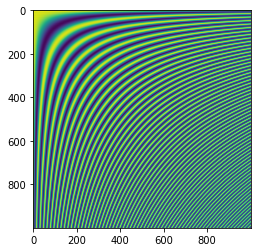

In [43]:
N = 1000
xs = np.linspace(0, np.pi*2, num=N)
mat = np.array(
    normalized([np.cos(f_i * 2 * np.pi * xs) for f_i in np.linspace(0, 10, num=N)])
)
print("Matrice di Fourier discreta, utilizzata per calcolare la Discrete Fourier Transform")
plt.imshow(mat)
plt.show()

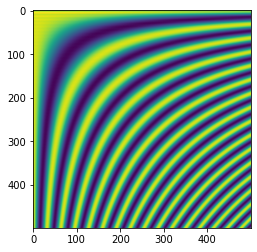

In [51]:
plt.imshow(mat[:N//2, :N//2])

# Controlliamo che i vettori dei coseni siano "abbastanza" ortogonali tra di loro

NB: i vettori che rappresentano coseni con frequenze diverse non sono perfettamenti ortogonali tra di loro, lo sarebbero solo su un dominio infinito e con una discretizzazione infinitamente fine.

I coseni sono perfettamente ortogonali solo per una discretizzazione infinitamente fine e per un dominio che tende ad infinito, dato che abbiamo un valore massimo per i valori che abbiamo usato e che la discretizzazione non è infinitamente fine avremo che i vettori riga non sono del tutto ortogonali tra di loro ma sono comunque "abbastanza" ortogonali, come vediamo nel grafico che segue:

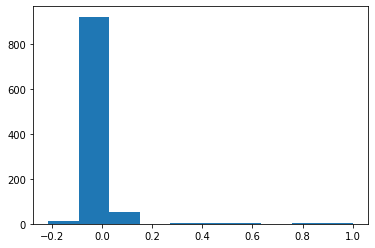

The absolute value of the scalar product is over 0.02 in 15.9% of cases


In [45]:
scalar_products = []
for row in mat:
    scalar_products.append(mat[mat.shape[0]//2] @ row)
plt.hist(scalar_products)
plt.show()

threshold = 0.02
bigs = [p for p in scalar_products if abs(p) > threshold]
print(f"The absolute value of the scalar product is over {threshold} in {len(bigs) / mat.shape[0] * 100}% of cases")

In [46]:
scalar_products

[0.0023529051047234675,
 0.0022898521954293886,
 0.0020858411748368435,
 0.001695401171408497,
 0.0010573369526638704,
 0.0001894489935689482,
 -0.0006634462607487206,
 -0.0011914258251264308,
 -0.0013254946814894504,
 -0.0011418057012725735,
 -0.0007008820507874258,
 -2.8101141747734204e-05,
 0.0008418798573314444,
 0.0017999671186002038,
 0.0026414623107857203,
 0.0031714600191007345,
 0.0033291738888155294,
 0.0031621499258246604,
 0.002734403565660481,
 0.0020899350872526953,
 0.0012727278635842549,
 0.0003697789025087884,
 -0.00046828534723700297,
 -0.0010759002228558007,
 -0.0013528965700974236,
 -0.001283251089562232,
 -0.0008960815295462688,
 -0.0002366039679227675,
 0.0006265880307546034,
 0.0015763162870675623,
 0.002446268138267374,
 0.0030747534336267443,
 0.00337037885344993,
 0.0033212634617237613,
 0.00295802691338733,
 0.0023257468528119943,
 0.0014878212595302205,
 0.0005477332660589888,
 -0.0003454247051073176,
 -0.0010341342689563083,
 -0.0014079497124842699,
 -0.001

In [47]:
def test_and_show_dct(xs, vector, name):
    print(f"The function {name} represented by the given vector is:")
    plt.plot(xs, vector)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()
    dct = mat @ vector / np.pi
    print(f"The Discrete Cosine Transform of {name} is:")
    plt.plot(xs, dct)
    plt.xlabel("Frequency")
    plt.ylabel("Coefficient")
    plt.show()
    print("Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:")
    vector_back = mat.T @ (mat @ vector)
    plt.plot(xs, vector_back)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()


# Esempio: somma di due coseni

The function sum of two cosines represented by the given vector is:


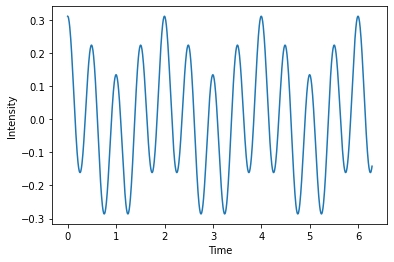

The Discrete Cosine Transform of sum of two cosines is:


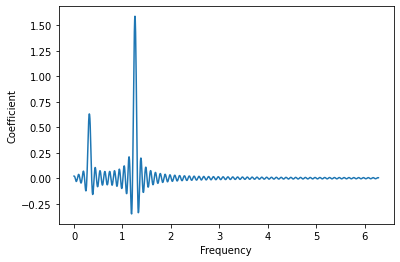

Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:


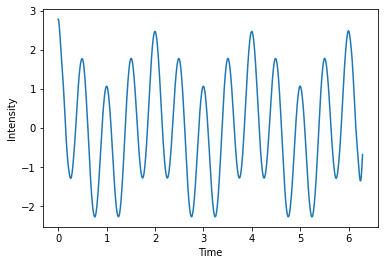

In [48]:
vec = mat[int(0.05*N)]*2 + mat[int(0.2*N)]*5

test_and_show_dct(xs, vec, "sum of two cosines")

 # Esempio: funzione a gradino

The function step function represented by the given vector is:


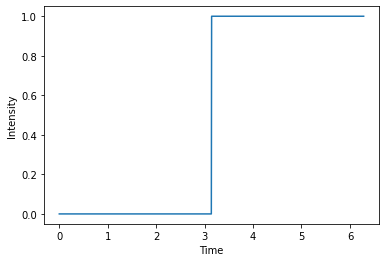

The Discrete Cosine Transform of step function is:


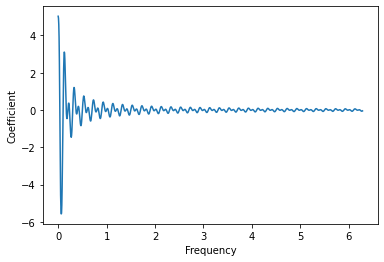

Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:


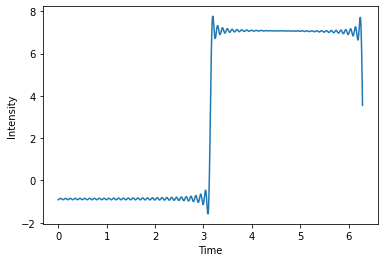

In [49]:
vec = np.stack([np.zeros(int(N/2)), np.ones(int(N/2))]).reshape(N)

test_and_show_dct(xs, vec, "step function")

# Esempio: gaussiane con diverse deviazioni standard




std = 0.2
The function Gaussian with std = 0.2 represented by the given vector is:


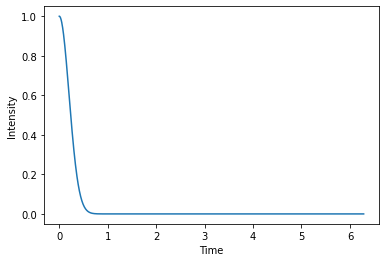

The Discrete Cosine Transform of Gaussian with std = 0.2 is:


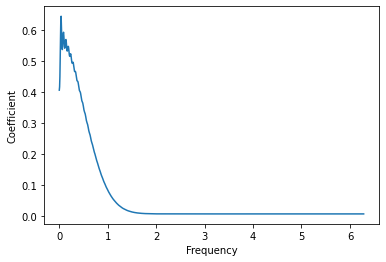

Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:


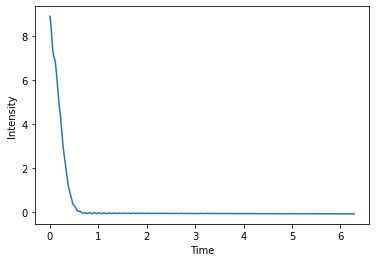




std = 1.1
The function Gaussian with std = 1.1 represented by the given vector is:


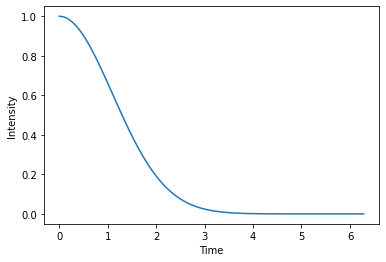

The Discrete Cosine Transform of Gaussian with std = 1.1 is:


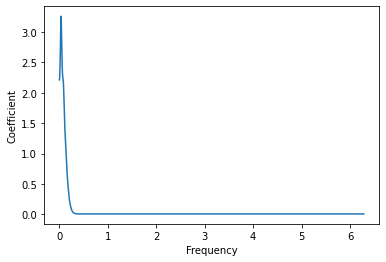

Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:


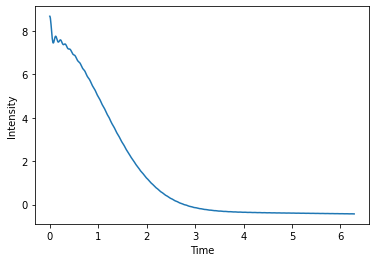




std = 2.0
The function Gaussian with std = 2.0 represented by the given vector is:


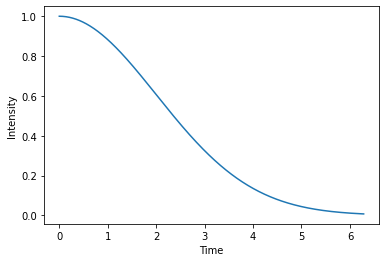

The Discrete Cosine Transform of Gaussian with std = 2.0 is:


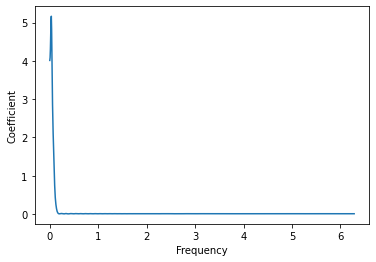

Now using the inverse transform (ignoring a scaling factor) (that is just the transpose of the matrix) to go back:


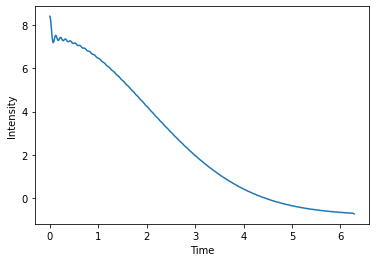

In [50]:
for sigma in np.linspace(0.2, 2, num=3):
    vec = np.exp(-np.multiply(xs, xs)/(2*sigma**2))
    print(f"\n\n\nstd = {sigma}")
    test_and_show_dct(xs, vec, f"Gaussian with std = {sigma}")